In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, imageio
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

Shape of the image : (100, 100, 3)
Depth of Image : 3


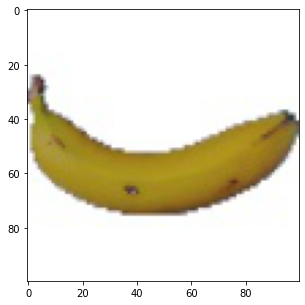

In [4]:
#Properties of Image
pic = load_img('./fruits-360_dataset/fruits-360/Test/Banana/100_100.jpg')
plt.figure(figsize = (5,5))
plt.imshow(pic)
img = img_to_array(pic)
print('Shape of the image : {}'.format(img.shape)) 
print('Depth of Image : {}'.format(img.ndim))

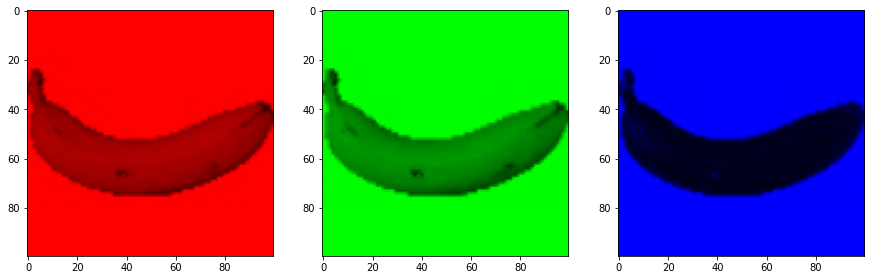

In [5]:
#Splitting layers of Image
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):      
     split_img = np.zeros(img.shape, dtype="uint8")      
     split_img[ :, :, c] = img[ :, :, c]   
     ax.imshow(split_img)

Number of Classes :  131


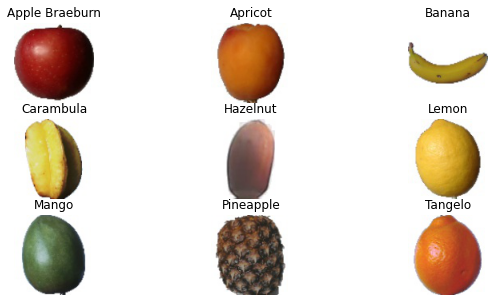

In [17]:
img_list = ['Apple Braeburn', 'Apricot', 'Banana', 'Carambula', 'Hazelnut', 'Lemon', 'Mango', 'Pineapple', 'Tangelo']

fig = plt.figure(figsize =(10,5))
for i in range(len(img_list)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(img_list[i])
    plt.axis("off")
    ax.imshow(load_img('./fruits-360_dataset/fruits-360/Test/' + img_list[i] +"/99_100.jpg", target_size=(100,100)))
print('Number of Classes : ',len(glob('./fruits-360_dataset/fruits-360/Training/*')))

In [9]:
model = Sequential()
model.add(Conv2D(64,3,activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(131,activation='softmax'))

model.compile(loss = "categorical_crossentropy",optimizer = "rmsprop", metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 32)      

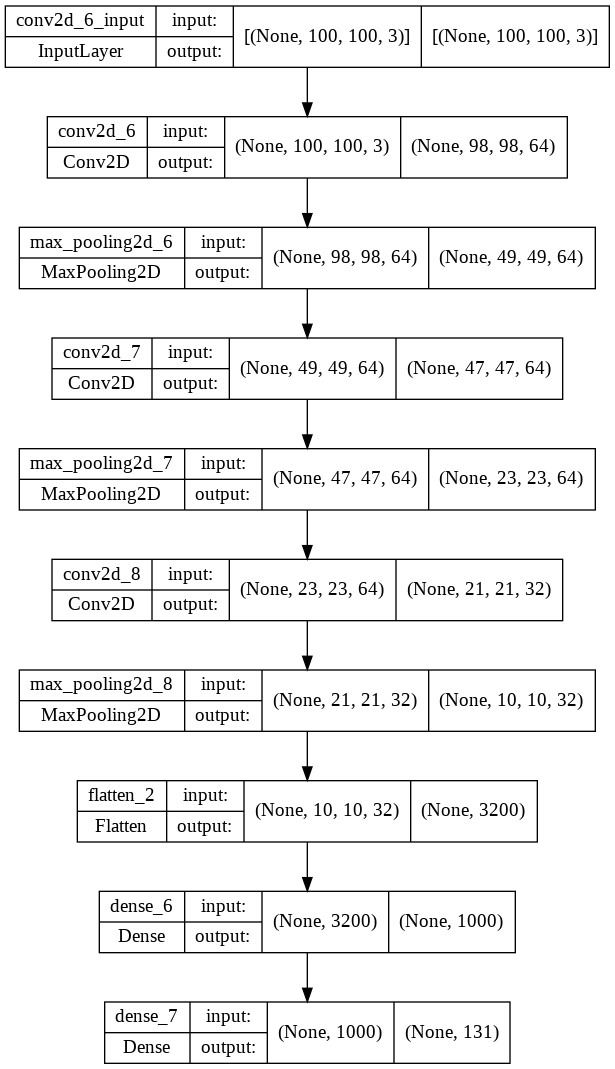

In [10]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [35]:
datagen_train = ImageDataGenerator(rescale= 1./255, shear_range=0.3,horizontal_flip=True,zoom_range=0.3)
datagen_test = ImageDataGenerator(rescale= 1./255)

train = datagen_train.flow_from_directory('./fruits-360_dataset/fruits-360/Training',target_size=(100,100),batch_size=64,color_mode='rgb',class_mode='categorical')
test = datagen_test.flow_from_directory('./fruits-360_dataset/fruits-360/Test',target_size=(100,100),batch_size=64,color_mode='rgb',class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [36]:
recog_model = model.fit_generator(generator = train, steps_per_epoch = 25, epochs=50,
                                    validation_data = test, validation_steps = 15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
25/25 [==============================] - 18s 203ms/step - loss: 4.9943 - accuracy: 0.0137 - val_loss: 4.8517 - val_accuracy: 0.0065
Epoch 2/50
25/25 [==============================] - 5s 200ms/step - loss: 4.7181 - accuracy: 0.0338 - val_loss: 4.6910 - val_accuracy: 0.0247
Epoch 3/50
25/25 [==============================] - 5s 206ms/step - loss: 4.2986 - accuracy: 0.0575 - val_loss: 3.9392 - val_accuracy: 0.0990
Epoch 4/50
25/25 [==============================] - 5s 203ms/step - loss: 3.7315 - accuracy: 0.1219 - val_loss: 3.2551 - val_accuracy: 0.1862
Epoch 5/50
25/25 [==============================] - 5s 203ms/step - loss: 3.2866 - accuracy: 0.1656 - val_loss: 2.9458 - val_accuracy: 0.2591
Epoch 6/50
25/25 [==============================] - 5s 202ms/step - loss: 2.9233 - accuracy: 0.2394 - val_loss: 2.4351 - val_accuracy: 0.3203
Epoch 7/50
25/25 [==============================] - 5s 200ms/step - loss: 2.4925 - accuracy: 0.3194 - val_loss: 2.1317 - val_accuracy: 0.4193
Epoch

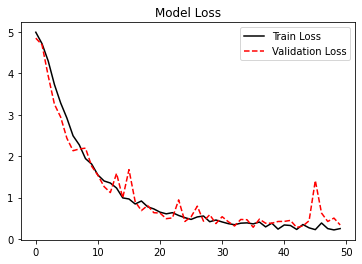

In [46]:
loss = recog_model.history['loss']
val_loss = recog_model.history['val_loss']
plt.plot(loss,label = "Train Loss", color = "black")
plt.plot(val_loss, label = "Validation Loss", color = "red", linestyle="dashed")
plt.title("Model Loss")
plt.legend()
plt.show()

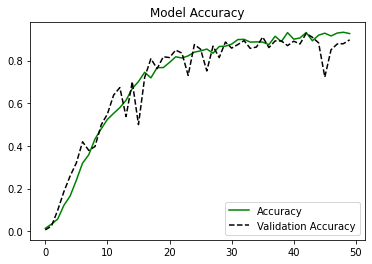

In [47]:
acc = recog_model.history['accuracy']
val_acc = recog_model.history['val_accuracy']
plt.plot(acc, label = "Accuracy", color = "green")
plt.plot(val_acc, label = "Validation Accuracy", color = "black", linestyle="dashed")
plt.title("Model Accuracy")
plt.legend()
plt.show()

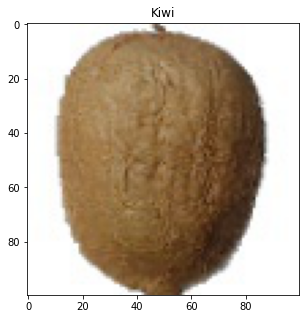

In [65]:
#img = load_img('/Users/jayantbabu/Downloads/archive-3/fruits-360_dataset/fruits-360/Test/Kiwi/35_100.jpg', target_size=(100,100))
from PIL import Image
img_pred = './fruits-360_dataset/fruits-360/Test/Kiwi/35_100.jpg'
np_image = Image.open(img_pred).resize((100,100))
np_image = np.array(np_image).astype('float32')/255
np_image = np.expand_dims(np_image, axis=0)
prediction = (np.argmax(model.predict(np_image), axis=-1))
pic = load_img(img_pred)
plt.figure(figsize = (5,5))
plt.imshow(pic)
plt.title([k for k, v in test.class_indices.items() if v == prediction[0]][0])
plt.show()

In [49]:
]

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui